In [1]:
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
from mpl_toolkits.mplot3d import Axes3D

In [2]:
weather_tree = pd.read_csv('county_tree_temp_dwp_prcp_Kent.csv')
cats = pd.read_csv('categoricals.csv').drop(columns = 'Unnamed: 0')

In [3]:
df = weather_tree.copy()

In [4]:
df['psgc'] = [ cats.loc[(cats.state_code == state) & (cats.county_code == county)].physiographic_class_code.values[0]
             for state, county in weather_tree[['state_code','county_code']].values ]

In [5]:
df['gssc'] = [ cats.loc[(cats.state_code == state) & (cats.county_code == county)].growingstock_stocking_code.values[0]
             for state, county in weather_tree[['state_code','county_code']].values ]

In [6]:
df['state_county'] = [ cats.loc[(cats.state_code == state) & (cats.county_code == county)].state_county.values[0]
                      for state, county in weather_tree[['state_code','county_code']].values ]

In [7]:
df[['psgc1', 'psgc2', 'psgc3']] = pd.get_dummies(df.psgc)

In [8]:
def find_deriv(df, state_county, species, feature):
    temp = df.loc[(df.species == species) & (df.state_county == state_county)][['year',feature]].diff()
    return temp[feature].values / temp.year.values

In [9]:
df['mean_biomass'] = df.Biomass / df.number_trees

In [10]:
df['dmean_biomass_dt'] = np.ones(len(df))

for sc, s in df[['state_county', 'species']].values:
    df.loc[(df.species == s) & (df.state_county == sc),['dmean_biomass_dt']] = find_deriv(df, sc, s, 'mean_biomass')

In [11]:
df['log_mean_mass'] = np.log(df.mean_biomass.values)

In [12]:
df['dlog_mean_mass_dt'] = np.ones(len(df))

for sc, s in df[['state_county', 'species']].values:
    df.loc[(df.species == s) & (df.state_county == sc),['dlog_mean_mass_dt']] = find_deriv(df, sc, s, 'log_mean_mass')

In [13]:
df['mean_volume'] = df.volume / df.number_trees

In [14]:
df['dmean_volume_dt'] = np.ones(len(df))

for sc, s in df[['state_county', 'species']].values:
    df.loc[(df.species == s) & (df.state_county == sc),['dmean_volume_dt']] = find_deriv(df, sc, s, 'mean_volume')

In [15]:
df['log_mean_volume'] = np.log(df.mean_volume)

/home/andrew/anaconda3/lib/python3.7/site-packages/pandas/core/series.py:679: RuntimeWarning: divide by zero encountered in log
  result = getattr(ufunc, method)(*inputs, **kwargs)


In [16]:
df['dlog_mean_volume_dt'] = np.ones(len(df))

for sc, s in df[['state_county', 'species']].values:
    df.loc[(df.species == s) & (df.state_county == sc),['dlog_mean_volume_dt']] = find_deriv(df, sc, s, 'log_mean_volume')

In [17]:
df.sample(10)

,year,state_code,county_code,species,latitude,longitude,volume,Biomass,number_trees,mean_temp,...,psgc2,psgc3,mean_biomass,dmean_biomass_dt,log_mean_mass,dlog_mean_mass_dt,mean_volume,dmean_volume_dt,log_mean_volume,dlog_mean_volume_dt
20994,2009,47,69,yellow-poplar,35.192302,-88.959326,108.416799,2096.844556,11,59.605753,...,1,0,190.622232,48.189048,5.250294,0.291421,9.856073,2.421853,2.288088,0.281994
9459,2005,12,99,slash pine,26.795154,-80.233982,192.796911,4463.609138,18,74.947945,...,1,0,247.978285,24.091202,5.513341,0.102199,10.710939,1.018710,2.371266,0.099941
27355,2012,5,51,red maple,34.632671,-93.097398,95.015984,2111.326823,29,64.735610,...,1,0,72.804373,-18.815800,4.287776,-0.208330,3.276413,-0.881957,1.186749,-0.215361
36635,2015,37,103,sweetgum,35.056545,-77.336863,157.990314,3649.607172,33,63.884653,...,1,0,110.594157,23.880361,4.705867,0.282690,4.787585,1.167298,1.566026,0.334359
18990,2009,1,107,sweetgum,33.270849,-88.023287,275.775694,5681.612368,70,62.854302,...,1,0,81.165891,-32.883015,4.396495,-0.340132,3.939653,-1.051368,1.371093,-0.236548
8222,2004,37,199,yellow-poplar,35.918032,-82.223980,80.842948,1506.491699,3,58.370462,...,1,0,502.163900,-643.239638,6.218927,-0.824586,26.947649,-37.693387,3.293896,-0.874953
14324,2007,5,41,sweetgum,33.786839,-91.209587,2.858392,72.226471,3,65.715934,...,1,0,24.075490,-310.408114,3.181194,-2.631394,0.952797,-16.976835,-0.048353,-2.934808
30160,2013,5,149,sweetgum,35.013313,-93.455456,218.684929,4583.368809,21,59.827123,...,1,0,218.255658,140.072148,5.385667,1.026608,10.413568,6.886891,2.343110,1.082754
9034,2005,1,27,loblolly pine,33.200921,-85.883430,1419.835375,28182.349499,133,62.094504,...,1,0,211.897365,-33.034224,5.356102,-0.144877,10.675454,-1.545415,2.367947,-0.135198
34486,2014,47,43,red maple,36.043526,-87.452988,30.442526,646.073181,1,60.439785,...,1,0,646.073181,218.995261,6.470913,0.566489,30.442526,10.695561,3.415841,0.606460


In [18]:
from sklearn.linear_model import LinearRegression

In [19]:
reg = LinearRegression(copy_X = True)

In [20]:
inputs = ['mean_temp', 'mean_dwp', 'mean_prcp', 'psgc1', 'psgc2', 'psgc3']
df.loc[df.species == 'loblolly pine'][inputs]

,mean_temp,mean_dwp,mean_prcp,psgc1,psgc2,psgc3
0,67.470830,54.867025,0.153781,0,1,0
5,66.790045,58.346707,0.113654,0,1,0
10,64.261655,54.418506,0.099781,0,1,0
14,62.523609,52.973149,0.121511,0,1,0
18,61.539774,51.246300,0.126829,0,1,0
...,...,...,...,...,...,...
45356,65.456250,56.725000,0.000000,0,1,0
45358,68.244356,58.799902,0.126651,0,1,0
45359,65.159270,57.846348,0.076713,0,1,0
45362,68.726519,57.909392,0.098343,0,1,0


In [21]:
inputs = ['mean_temp', 'mean_dwp', 'mean_prcp', 'psgc1', 'psgc2', 'psgc3']

reg.fit(df.loc[df.species == 'loblolly pine'][inputs],df.loc[df.species == 'loblolly pine']['Biomass'])

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None, normalize=False)

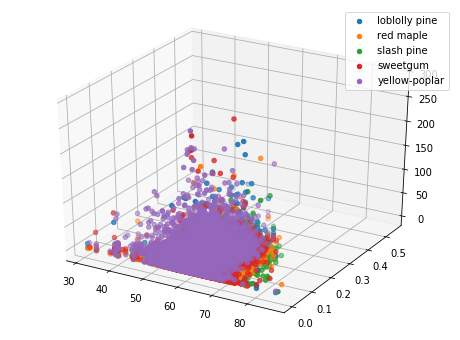

In [41]:
%matplotlib inline

fig = plt.figure(figsize = (8,6))
ax = fig.add_subplot(111, projection='3d')

species = df.species.unique()

for s in species:
    mean_mean_temp = df.loc[(df.species == s)].mean_temp.values.mean()
    mean_temp_c_s = (df.loc[(df.species == s)].mean_temp.values - mean_mean_temp) ** 2
    
    ax.scatter(#mean_temp_c_s,
        df.loc[(df.species == s)].mean_temp,
               df.loc[(df.species == s)].mean_prcp,
               df.loc[(df.species == s)].volume / df.loc[(df.species == s)].number_trees,
               label = s)
ax.set_xlabel = 'mean_temp'
ax.set_ylabel = 'mean_prcp'
ax.set_zlabel = 'Biomass'

plt.legend()
plt.show()

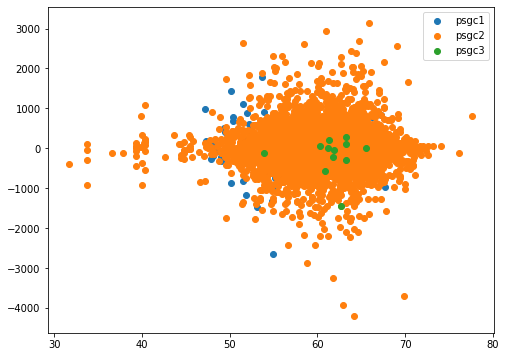

In [42]:
%matplotlib inline

fig = plt.figure(figsize = (8,6))
ax = fig.add_subplot(111)

species = 'yellow-poplar'

for p in ['psgc1','psgc2','psgc3']:
    mean_mean_temp = df.loc[(df.species == species) & (df[p] == 1)].mean_temp.values.mean()
    mean_temp_c_s = (df.loc[(df.species == species) & (df[p] == 1)].mean_temp.values - mean_mean_temp) **2
    
    ax.scatter(df.loc[(df.species == species) & (df[p] == 1)].mean_temp,
        #df.loc[(df.species == species) & (df[p] == 1)].mean_temp,
               df.loc[(df.species == species) & (df[p] == 1)].dmean_biomass_dt,
               label = p)
    
ax.set_xlabel = 'mean_temp'
ax.set_ylabel = 'Biomass'
#ax.set_xlim(50,70)

plt.legend()
plt.show()

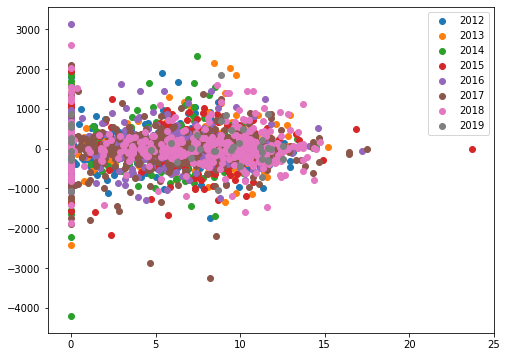

In [43]:
%matplotlib inline

fig = plt.figure(figsize = (8,6))
ax = fig.add_subplot(111)

species = 'yellow-poplar'

for y in np.arange(2012,2020,1):
    mean_mean_temp = df.loc[(df.species == species) & (df.year == y)].mean_temp.values.mean()
    mean_temp_c_s = (df.loc[(df.species == species) & (df.year == y)].mean_temp.values - mean_mean_temp) **2
    
    ax.scatter(#mean_temp_c_s,
                df.loc[(df.species == species) & (df.year == y)].mean_prcp * df.loc[(df.species == species) & (df.year == y)].mean_temp,
               df.loc[(df.species == species) & (df.year == y)].dmean_biomass_dt,
               label = y)
ax.set_xlabel = 'mean_prcp'
ax.set_ylabel = 'Biomass'


plt.legend()
plt.show()

/home/andrew/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:11: RuntimeWarning: divide by zero encountered in log
  # This is added back by InteractiveShellApp.init_path()
/home/andrew/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:11: RuntimeWarning: divide by zero encountered in log
  # This is added back by InteractiveShellApp.init_path()
/home/andrew/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:11: RuntimeWarning: divide by zero encountered in log
  # This is added back by InteractiveShellApp.init_path()
/home/andrew/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:11: RuntimeWarning: divide by zero encountered in log
  # This is added back by InteractiveShellApp.init_path()
/home/andrew/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:11: RuntimeWarning: divide by zero encountered in log
  # This is added back by InteractiveShellApp.init_path()


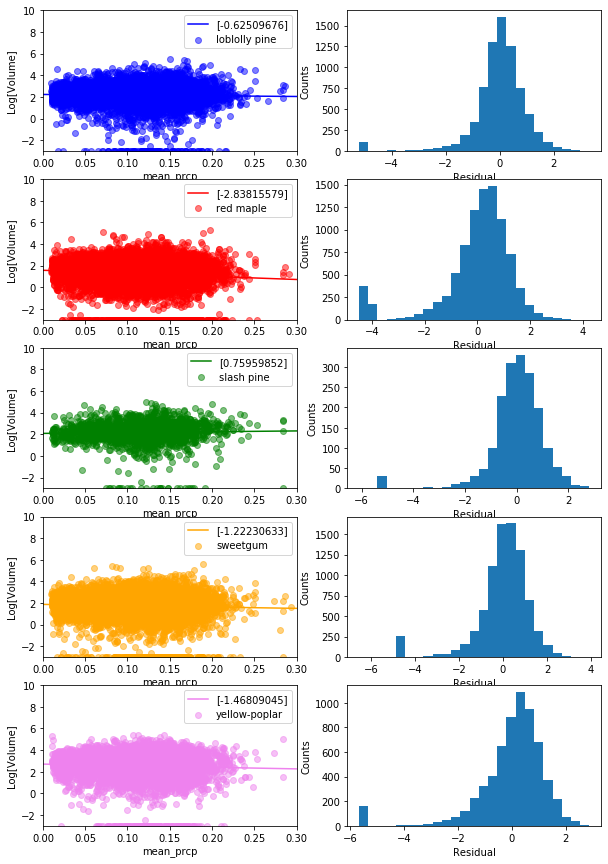

In [44]:
%matplotlib inline

species = df.species.unique()
colors = ['b','r','g','orange','violet']
fig, ax = plt.subplots(nrows = len(species), ncols = 2, figsize = (10,15))

x = np.arange(0.0, 0.6, 0.01)

for i, s in enumerate(species):
    prcp = df.loc[(df.species == s) & (df.mean_prcp > 0.01)].mean_prcp.values
    y = np.log(df.loc[(df.species == s) & (df.mean_prcp > 0.01)].mean_volume.values)
    y[y <-5] = -3
    reg.fit(prcp.reshape(-1,1), y.ravel())
    
    ax[i,0].plot(x, reg.predict(x.reshape(-1,1)), color = colors[i], label = reg.coef_)
    ax[i,0].scatter(prcp, y, label = s, alpha = 0.5, color = colors[i])
    ax[i,0].set_xlabel('mean_prcp')
    ax[i,0].set_ylabel('Log[Volume]')
    ax[i,0].legend()
    ax[i,0].set_ylim(-3,10)
    ax[i,0].set_xlim(0,0.3)
    
    ax[i,1].hist(y - reg.predict(prcp.reshape(-1,1)), bins  = 25)
    ax[i,1].set_ylabel('Counts')
    ax[i,1].set_xlabel('Residual')
#ax.set_xlim(0,1e30)

plt.show()

/home/andrew/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:11: RuntimeWarning: divide by zero encountered in log
  # This is added back by InteractiveShellApp.init_path()
/home/andrew/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:11: RuntimeWarning: divide by zero encountered in log
  # This is added back by InteractiveShellApp.init_path()
/home/andrew/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:11: RuntimeWarning: divide by zero encountered in log
  # This is added back by InteractiveShellApp.init_path()
/home/andrew/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:11: RuntimeWarning: divide by zero encountered in log
  # This is added back by InteractiveShellApp.init_path()
/home/andrew/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:11: RuntimeWarning: divide by zero encountered in log
  # This is added back by InteractiveShellApp.init_path()


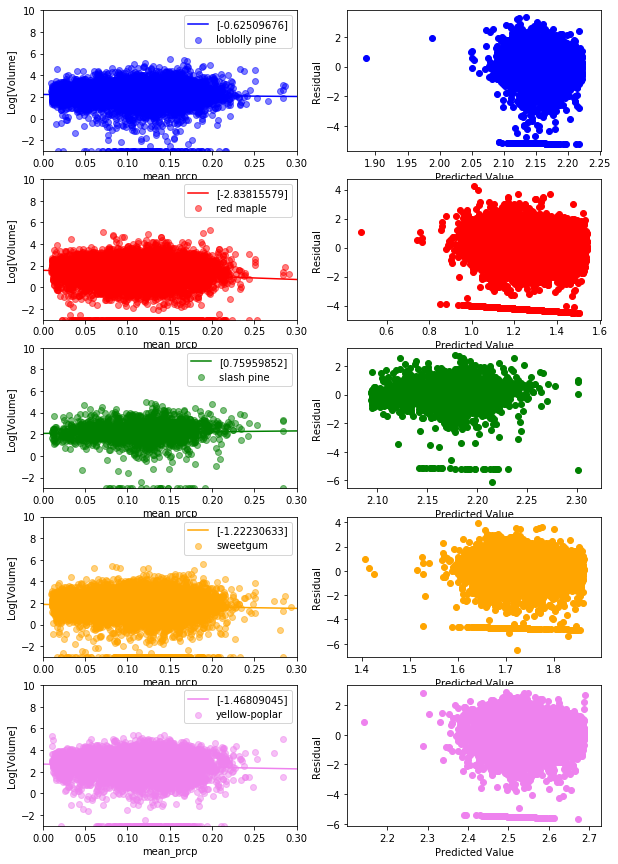

In [45]:
%matplotlib inline

species = df.species.unique()
colors = ['b','r','g','orange','violet']
fig, ax = plt.subplots(nrows = len(species), ncols = 2, figsize = (10,15))

x = np.arange(0.0, 0.6, 0.01)

for i, s in enumerate(species):
    prcp = df.loc[(df.species == s) & (df.mean_prcp > 0.01)].mean_prcp.values
    y = np.log(df.loc[(df.species == s) & (df.mean_prcp > 0.01)].mean_volume.values)
    y[y <-5] = -3
    reg.fit(prcp.reshape(-1,1), y.ravel())
    
    ax[i,0].plot(x, reg.predict(x.reshape(-1,1)), color = colors[i], label = reg.coef_)
    ax[i,0].scatter(prcp, y, label = s, alpha = 0.5, color = colors[i])
    ax[i,0].set_xlabel('mean_prcp')
    ax[i,0].set_ylabel('Log[Volume]')
    ax[i,0].legend()
    ax[i,0].set_ylim(-3,10)
    ax[i,0].set_xlim(0,0.3)
    
    ax[i,1].scatter(reg.predict(prcp.reshape(-1,1)), y - reg.predict(prcp.reshape(-1,1)), color = colors[i])
    ax[i,1].set_ylabel('Residual')
    ax[i,1].set_xlabel('Predicted Value')
#ax.set_xlim(0,1e30)

plt.show()

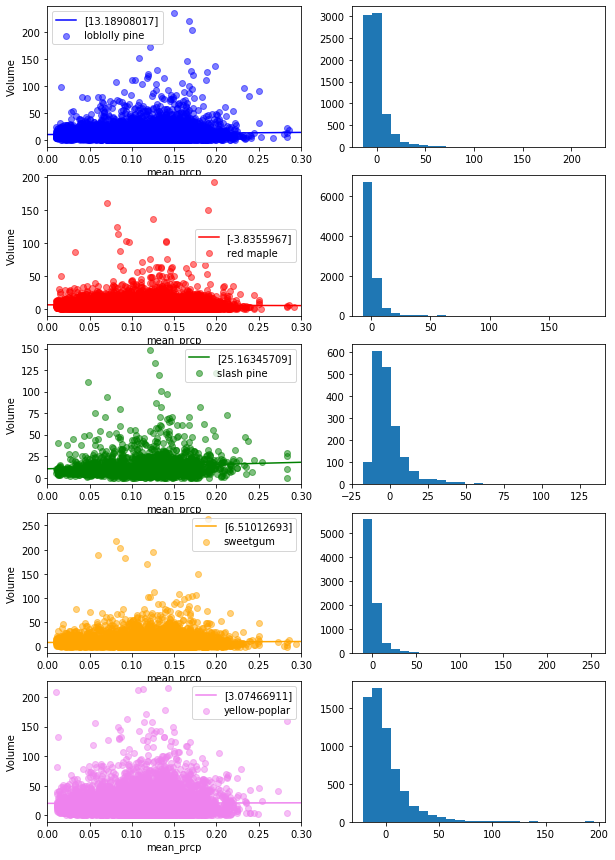

In [27]:
%matplotlib inline

species = df.species.unique()
colors = ['b','r','g','orange','violet']
fig, ax = plt.subplots(nrows = len(species), ncols = 2, figsize = (10,15))

x = np.arange(0.0, 0.6, 0.01)

for i, s in enumerate(species):
    prcp = df.loc[(df.species == s) & (df.mean_prcp > 0.01)].mean_prcp.values
    y = df.loc[(df.species == s) & (df.mean_prcp > 0.01)].mean_volume.values
    #y[y <-10] = -10
    reg.fit(prcp.reshape(-1,1), y.ravel())
    
    ax[i,0].plot(x, reg.predict(x.reshape(-1,1)), color = colors[i], label = reg.coef_)
    ax[i,0].scatter(prcp, y, label = s, alpha = 0.5, color = colors[i])
    ax[i,0].set_xlabel('mean_prcp')
    ax[i,0].set_ylabel('Volume')
    ax[i,0].legend()
    #ax[i,0].set_ylim(0,1e4)
    ax[i,0].set_xlim(0,0.3)
    
    ax[i,1].hist(y - reg.predict(prcp.reshape(-1,1)), bins  = 25)
#ax.set_xlim(0,1e30)

plt.show()

/home/andrew/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:11: RuntimeWarning: divide by zero encountered in log
  # This is added back by InteractiveShellApp.init_path()
/home/andrew/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:11: RuntimeWarning: divide by zero encountered in log
  # This is added back by InteractiveShellApp.init_path()
/home/andrew/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:11: RuntimeWarning: divide by zero encountered in log
  # This is added back by InteractiveShellApp.init_path()
/home/andrew/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:11: RuntimeWarning: divide by zero encountered in log
  # This is added back by InteractiveShellApp.init_path()
/home/andrew/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:11: RuntimeWarning: divide by zero encountered in log
  # This is added back by InteractiveShellApp.init_path()


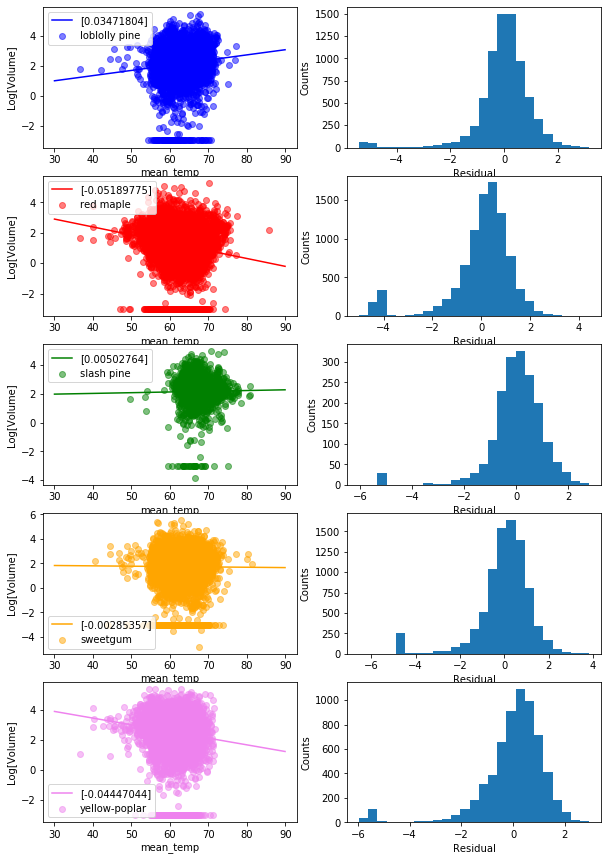

In [28]:
%matplotlib inline

species = df.species.unique()
colors = ['b','r','g','orange','violet']
fig, ax = plt.subplots(nrows = len(species), ncols = 2, figsize = (10,15))

x = np.arange(30,90, 0.1)

for i, s in enumerate(species):
    prcp = df.loc[(df.species == s) & (df.mean_prcp > 0.01)].mean_temp.values
    y = np.log(df.loc[(df.species == s) & (df.mean_prcp > 0.01)].mean_volume.values)
    y[y <-5] = -3
    reg.fit(prcp.reshape(-1,1), y.ravel())
    
    ax[i,0].plot(x, reg.predict(x.reshape(-1,1)), color = colors[i], label = reg.coef_)
    ax[i,0].scatter(prcp, y, label = s, alpha = 0.5, color = colors[i])
    ax[i,0].set_xlabel('mean_temp')
    ax[i,0].set_ylabel('Log[Volume]')
    ax[i,0].legend()
    #ax[i,0].set_ylim(-3,10)
    #ax[i,0].set_xlim(0,0.016)
    
    ax[i,1].hist(y - reg.predict(prcp.reshape(-1,1)), bins  = 25)
    ax[i,1].set_ylabel('Counts')
    ax[i,1].set_xlabel('Residual')
#ax.set_xlim(0,1e30)

plt.show()

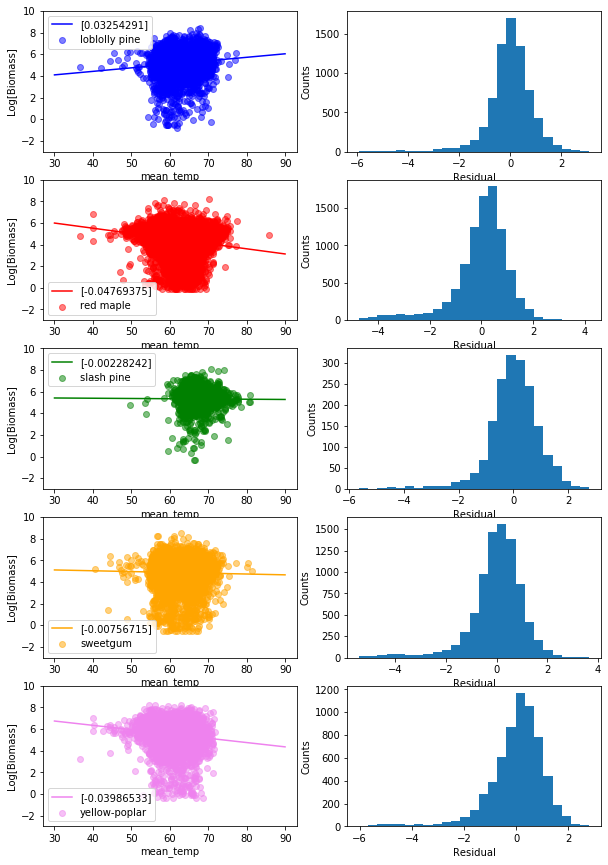

In [29]:
%matplotlib inline

species = df.species.unique()
colors = ['b','r','g','orange','violet']
fig, ax = plt.subplots(nrows = len(species), ncols = 2, figsize = (10,15))

x = np.arange(30,90, 0.1)

for i, s in enumerate(species):
    prcp = df.loc[(df.species == s) & (df.mean_prcp > 0.01)].mean_temp.values
    y = np.log(df.loc[(df.species == s) & (df.mean_prcp > 0.01)].mean_biomass.values)
    y[y <-5] = -3
    reg.fit(prcp.reshape(-1,1), y.ravel())
    
    ax[i,0].plot(x, reg.predict(x.reshape(-1,1)), color = colors[i], label = reg.coef_)
    ax[i,0].scatter(prcp, y, label = s, alpha = 0.5, color = colors[i])
    ax[i,0].set_xlabel('mean_temp')
    ax[i,0].set_ylabel('Log[Biomass]')
    ax[i,0].legend()
    ax[i,0].set_ylim(-3,10)
    #ax[i,0].set_xlim(0,0.016)
    
    ax[i,1].hist(y - reg.predict(prcp.reshape(-1,1)), bins  = 25)
    ax[i,1].set_ylabel('Counts')
    ax[i,1].set_xlabel('Residual')
#ax.set_xlim(0,1e30)

plt.show()

/home/andrew/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:11: RuntimeWarning: invalid value encountered in log
  # This is added back by InteractiveShellApp.init_path()
/home/andrew/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:12: RuntimeWarning: invalid value encountered in less
  if sys.path[0] == '':


ValueError: Input contains NaN, infinity or a value too large for dtype('float64').

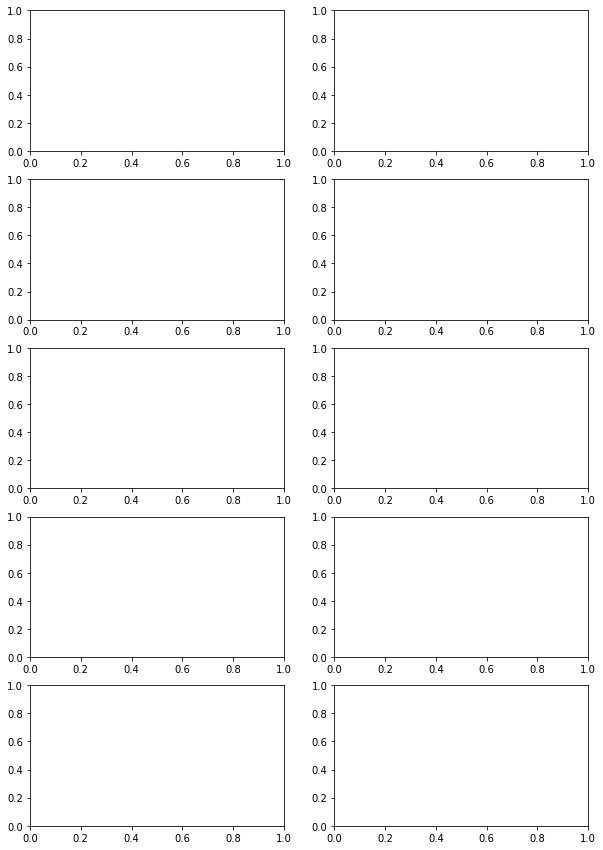

In [66]:
%matplotlib inline

species = df.species.unique()
colors = ['b','r','g','orange','violet']
fig, ax = plt.subplots(nrows = len(species), ncols = 2, figsize = (10,15))

x = np.arange(0,0.4, 0.01)

for i, s in enumerate(species):
    prcp = df.loc[(df.species == s) & (df.mean_prcp > 0.01)].mean_prcp.values
    y = np.log(df.loc[(df.species == s) & (df.mean_prcp > 0.01)].dlog_mean_mass_dt.values)
    reg.fit(prcp.reshape(-1,1), y.ravel())
    
    ax[i,0].plot(x, reg.predict(x.reshape(-1,1)), color = colors[i], label = reg.coef_)
    ax[i,0].scatter(prcp, y, label = s, alpha = 0.5, color = colors[i])
    ax[i,0].set_xlabel('mean_prcp')
    ax[i,0].set_ylabel('Log[biomass]')
    ax[i,0].legend()
    #ax[i,0].set_ylim(-3,10)
    ax[i,0].set_xlim(0,0.3)
    
    ax[i,1].hist(y - reg.predict(prcp.reshape(-1,1)), bins  = 25)
    ax[i,1].set_ylabel('Counts')
    ax[i,1].set_xlabel('Residual')
#ax.set_xlim(0,1e30)

plt.show()

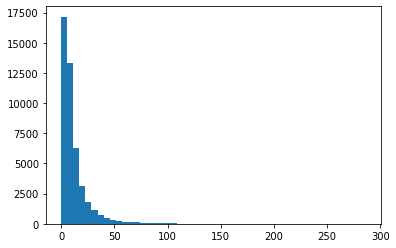

In [31]:
plt.hist(df.mean_volume, bins = 50)
plt.show()

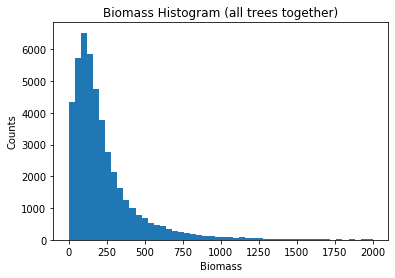

In [32]:
plt.hist(df.mean_biomass, bins = 50, range = (0, 2000))
plt.xlabel('Biomass')
plt.ylabel('Counts')
plt.title('Biomass Histogram (all trees together)')
plt.show()

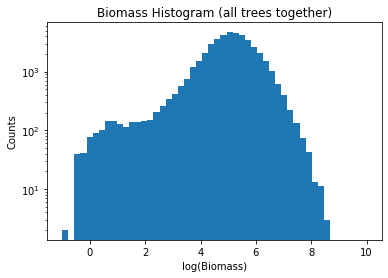

In [33]:
plt.hist(np.log(df.mean_biomass), bins = 50, range = (-1, 10))
plt.xlabel('log(Biomass)')
plt.ylabel('Counts')
plt.yscale('log')
plt.title('Biomass Histogram (all trees together)')
plt.show()

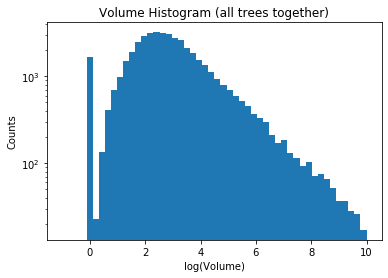

In [34]:
plt.hist(np.sqrt(df.mean_volume), bins = 50, range = (-1, 10))
plt.xlabel('log(Volume)')
plt.ylabel('Counts')
plt.yscale('log')
plt.title('Volume Histogram (all trees together)')
plt.show()

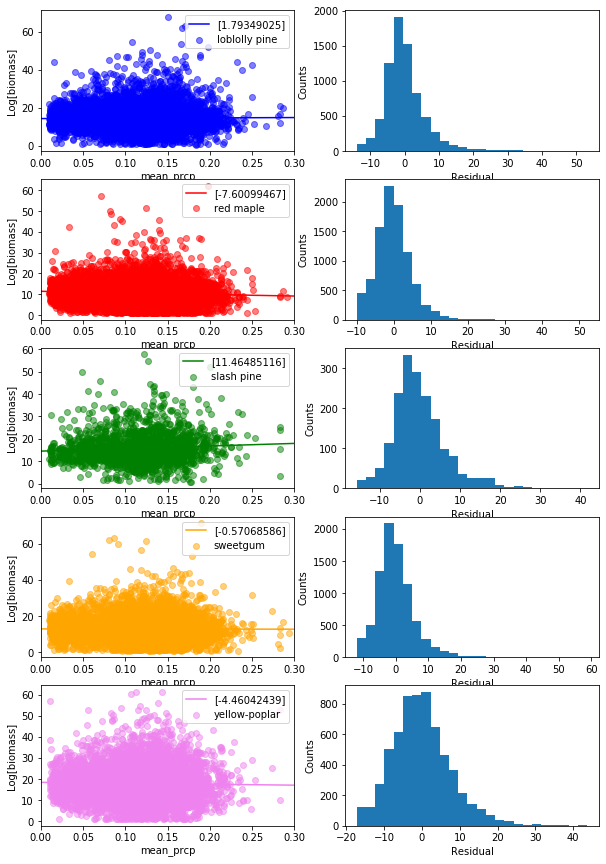

In [35]:
%matplotlib inline

species = df.species.unique()
colors = ['b','r','g','orange','violet']
fig, ax = plt.subplots(nrows = len(species), ncols = 2, figsize = (10,15))

x = np.arange(0,0.4, 0.01)

for i, s in enumerate(species):
    prcp = df.loc[(df.species == s) & (df.mean_prcp > 0.01)].mean_prcp.values
    y = np.sqrt(df.loc[(df.species == s) & (df.mean_prcp > 0.01)].mean_biomass.values)
    reg.fit(prcp.reshape(-1,1), y.ravel())
    
    ax[i,0].plot(x, reg.predict(x.reshape(-1,1)), color = colors[i], label = reg.coef_)
    ax[i,0].scatter(prcp, y, label = s, alpha = 0.5, color = colors[i])
    ax[i,0].set_xlabel('mean_prcp')
    ax[i,0].set_ylabel('Log[biomass]')
    ax[i,0].legend()
    #ax[i,0].set_ylim(-3,10)
    ax[i,0].set_xlim(0,0.3)
    
    ax[i,1].hist(y - reg.predict(prcp.reshape(-1,1)), bins  = 25)
    ax[i,1].set_ylabel('Counts')
    ax[i,1].set_xlabel('Residual')
#ax.set_xlim(0,1e30)

plt.show()

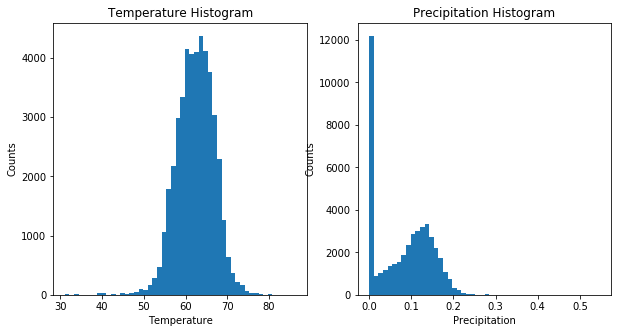

In [36]:
fig, ax = plt.subplots(nrows = 1, ncols = 2, figsize= (10,5))

ax[0].hist(df.mean_temp, bins = 50)
ax[0].set_xlabel('Temperature')
ax[0].set_ylabel('Counts')
ax[0].set_title('Temperature Histogram')

ax[1].hist(df.mean_prcp, bins = 50)
ax[1].set_xlabel('Precipitation')
ax[1].set_ylabel('Counts')
ax[1].set_title('Precipitation Histogram')

plt.show()

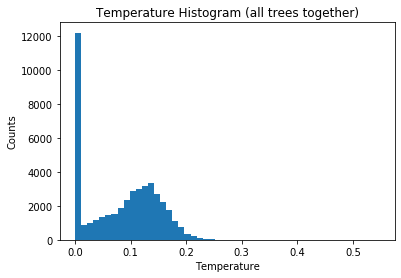

In [37]:
plt.hist(df.mean_prcp, bins = 50)
plt.xlabel('Temperature')
plt.ylabel('Counts')
plt.title('Temperature Histogram (all trees together)')
plt.show()

In [81]:
df.to_csv('temp.csv')